In [2]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import datasets


In [3]:
#lOADING THE DATA FILE
data = pd.read_csv('Iris_Data.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#HAVING A QUICK GLIMPSE AT THE SHAPE OF THE DATA
data.shape

(150, 6)

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:

from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


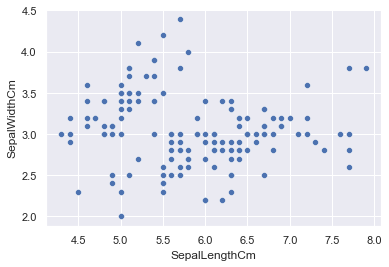

In [7]:
#VISUALIZING THE DATA TO GET A BETTER UNDERSTANDING
sns.scatterplot(data = data, x = "SepalLengthCm", y = "SepalWidthCm")

plt.show()

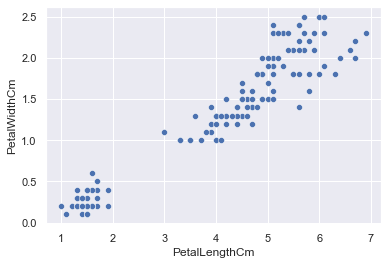

In [8]:
sns.scatterplot(data = data, x = "PetalLengthCm", y = "PetalWidthCm")

plt.show()

In [9]:
x = data.iloc[:, [0, 1, 2, 3]].values
x.shape

(150, 4)

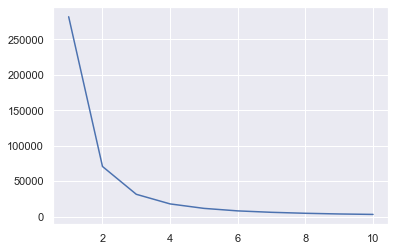

In [10]:
#DETERMINING THE VALUE OF k IN KMEANS BY THE ELBOW METHOD
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)

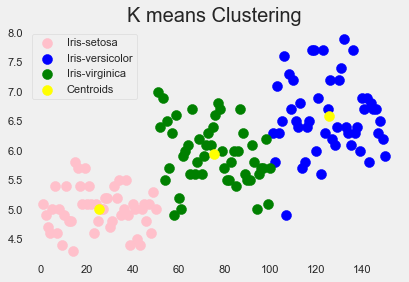

In [11]:
#SINCE FROM THE ELBOW METHOD, WE GET K=3, WE USE THIS VALUE TO CLUSTER THE DATA USING THE KMEANS
from sklearn.cluster import KMeans
   
km=KMeans(n_clusters= 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
Y_means=km.fit_predict(x)


plt.style.use('fivethirtyeight')

plt.scatter(x[Y_means==0,0], x[Y_means==0,1],s=100,c='pink',label='Iris-setosa')
plt.scatter(x[Y_means==1,0], x[Y_means==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[Y_means==2,0], x[Y_means==2,1],s=100,c='green',label='Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


plt.style.use('fivethirtyeight')
plt.title('K means Clustering', fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [12]:
#IMPORTING NECESSARY LIBRARY TO TEST ACCURACY OF THE DATA
from sklearn.metrics import silhouette_score

In [13]:
#PRINTING THE SILHOUTTE SCORE
Score=silhouette_score(x, km.labels_, metric='euclidean')
print('Silhoutter Score: %.3f' %Score)

Silhoutter Score: 0.582
